<a href="https://colab.research.google.com/github/omarion3698/DecisionTreeAnimalClassifier/blob/master/decision_tree_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Omar A. Hussein
# ID: 663880
## Lecturer: Dr. Lawrence B Nderu

### Task: I am building a decision tree classifier to distinguish between mammals and non-mammals based on features like hair and milk production. The project involves data preparation, model training, and evaluation using Scikit-learn.

In [ ]:
import numpy as np
from math import log2
import pandas as pd

In [ ]:
data = pd.read_csv('/content/sample_data/animals.csv', header='infer')
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [ ]:
# Show the top rows of the dataset
data.head()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# check the bottom rows of the dataset
data.tail()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
89,90,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5


In [ ]:
# know the columns of the dataset
data.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')

In [ ]:
# Remove any leading and trailing whitespace from the column names
data.columns = data.columns.str.strip()

In [ ]:
# check descriptive statistics of the dataset
data.describe()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,0.422222,0.200000,0.577778,0.411111,0.222222,0.388889,0.577778,0.611111,0.822222,0.777778,0.077778,0.177778,2.855556,0.733333,0.144444,0.433333,2.833333
std,26.124701,0.496681,0.402241,0.496681,0.494792,0.418069,0.490229,0.496681,0.490229,0.384467,0.418069,0.269322,0.384467,2.063928,0.444694,0.353509,0.498312,2.116017
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,45.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,67.750000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# Display a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sr        90 non-null     int64
 1   Hair      90 non-null     int64
 2   Feathers  90 non-null     int64
 3   Eggs      90 non-null     int64
 4   Milk      90 non-null     int64
 5   Airborne  90 non-null     int64
 6   Aquatic   90 non-null     int64
 7   Predator  90 non-null     int64
 8   Teeth     90 non-null     int64
 9   Backbone  90 non-null     int64
 10  Breathes  90 non-null     int64
 11  Venemous  90 non-null     int64
 12  Fins      90 non-null     int64
 13  Legs      90 non-null     int64
 14  Tails     90 non-null     int64
 15  Domestic  90 non-null     int64
 16  Catsize   90 non-null     int64
 17  Class     90 non-null     int64
dtypes: int64(18)
memory usage: 12.8 KB


In [ ]:
# Replace the values 2, 3, 4, 5, 6, and 7 in the 'Class' column with the string 'non-mammals'.
data['Class']=data['Class'].replace([2,3,4,5,6,7],'non-mammals')
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,non-mammals
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,non-mammals
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,non-mammals
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,non-mammals


In [ ]:
# Replace the value 1 in the 'Class' column with the string 'mammals'.
data['Class']=data['Class'].replace([1],'mammals')
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammals
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,non-mammals
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,non-mammals
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,non-mammals
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,non-mammals


In [ ]:
# make sure that the column 'Class' has 2 values only
data['Class'].value_counts()

Class
non-mammals    53
mammals        37
Name: count, dtype: int64

In [ ]:
# Check if there is any null value
data.isnull().sum()

Sr          0
Hair        0
Feathers    0
Eggs        0
Milk        0
Airborne    0
Aquatic     0
Predator    0
Teeth       0
Backbone    0
Breathes    0
Venemous    0
Fins        0
Legs        0
Tails       0
Domestic    0
Catsize     0
Class       0
dtype: int64

There is no missing value in this dataset

In [ ]:
# Create a table that shows how combinations of 'Backbone' and 'Hair' features
# are distributed across different classes in the dataset
pd.crosstab([data['Backbone'], data['Hair']], data['Class'])

Class          mammals  non-mammals
Backbone Hair                      
0        0           0           13
         1           0            3
1        0           2           37
         1          35            0

In [ ]:
from sklearn import tree

In [ ]:
# Extract the 'Class' column from the dataset and assign it to the variable y
y=data['Class']
y

0         mammals
1         mammals
2     non-mammals
3         mammals
4         mammals
         ...     
85    non-mammals
86    non-mammals
87    non-mammals
88    non-mammals
89    non-mammals
Name: Class, Length: 90, dtype: object

In [ ]:
# Drop the 'Sr' and 'Class' columns from the dataset and assign the resulting dataset to the variable X
X=data.drop(['Sr', 'Class'], axis=1)
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [ ]:
# Initialize a Decision Tree Classifier with 'entropy' as the criterion and a maximum depth of 3
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
# display the initialized DT
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Fit the Decision Tree Classifier to the feature data (X) and target labels (y)
clf=clf.fit(X,y)
# Display the fitted Decision Tree Classifier
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus
from IPython.display import Image

In [ ]:
# Export the Decision Tree model as a DOT file format string, including feature names, class names, and visual formatting.
dot_data=tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals', 'non-mammals'], filled=True, out_file=None)
dot_data # Display the DOT format string of the Decision Tree

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Milk <= 0.5\\nentropy = 0.977\\nsamples = 90\\nvalue = [37, 53]\\nclass = non-mammals", fillcolor="#c3e1f7"] ;\n1 [label="entropy = 0.0\\nsamples = 53\\nvalue = [0, 53]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [ ]:
# Convert the DOT format string to a graph object using pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)

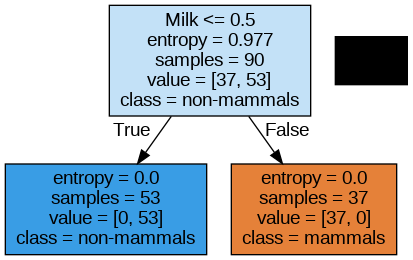

In [ ]:
# Display the graph object
graph
# Convert the graph to a PNG image and display it
Image(graph.create_png())

In [ ]:
# Define a list of test data with various feature values and class labels
testData=[[1,1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammals'],
          [2,0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'non-mammals'],
          [3,0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'non-mammals'],
          [4,1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1,  'mammals']]
# Display the test data
testData

[[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 'mammals'],
 [2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 'non-mammals'],
 [3, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'non-mammals'],
 [4, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1, 'mammals']]

In [ ]:
# Display the column names of the dataset
data.columns

Index(['Sr', 'Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic',
       'Predator', 'Teeth', 'Backbone', 'Breathes', 'Venemous', 'Fins', 'Legs',
       'Tails', 'Domestic', 'Catsize', 'Class'],
      dtype='object')

In [ ]:
# Convert the list of test data into a dataset with columns matching those of the original dataset
testData=pd.DataFrame(testData, columns=data.columns)
# Display the resulting dataset
testData

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
1,2,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,non-mammals
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
3,4,1,0,0,0,0,0,1,1,1,1,0,0,4,1,0,1,mammals


In [ ]:
# Extract the 'Class' column from the test data DataFrame and assign it to the variable testY
testY=testData['Class']
# Display the 'Class' column
testY

0        mammals
1    non-mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
# Drop the 'Sr' and 'Class' columns from the test data dataset and assign the resulting dataset to the variable testX
testX=testData.drop(['Sr', 'Class'], axis=1)
# Display the test data
testX

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,0,0,0,1,1,1,1,0,0,4,1,0,1


In [ ]:
# Use the trained Decision Tree Classifier to make predictions on the test data features
predY=clf.predict(testX)
# Display the predicted classes
predY

array(['mammals', 'non-mammals', 'non-mammals', 'non-mammals'],
      dtype=object)

In [ ]:
# Display the actual class labels from the test data
testY

0        mammals
1    non-mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
3/4*100

75.0

In [ ]:
# Combine the 'Sr' column, actual 'Class' labels, and predicted class labels into a new dataset
predictions=pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name='Predicted Class')], axis=1)
# Display the dataset showing the actual and predicted class labels for comparison
predictions

,Sr,Class,Predicted Class
0,1,mammals,mammals
1,2,non-mammals,non-mammals
2,3,non-mammals,non-mammals
3,4,mammals,non-mammals


In [ ]:
3/4*100

75.0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testY, predY) # checks y

0.75

In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75
